---
title: "Practice Activity 9.1: Decision Boundaries"
format: 
  html:
    embed-resources: true
execute:
  echo: true
code-fold: true
author: James Compagno
jupyter: python3
---

In [2]:
import numpy as np
import pandas as pd
import plotnine as p9
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

In [3]:
# Read the data
ha = pd.read_csv("https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1")
ha = ha.dropna()

ha.describe()

,age,sex,cp,trtbps,chol,restecg,thalach
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,53.813725,0.666667,2.049020,131.245098,248.377451,0.558824,149.147059
std,9.354781,0.472564,1.030352,18.352024,53.176624,0.526603,23.990925
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,71.000000
25%,46.000000,0.000000,1.000000,120.000000,212.750000,0.000000,132.000000
50%,54.000000,1.000000,2.000000,129.500000,241.000000,1.000000,153.500000
75%,61.000000,1.000000,3.000000,140.000000,276.250000,1.000000,166.250000
max,77.000000,1.000000,4.000000,200.000000,564.000000,2.000000,202.000000


In [4]:
# Separate X and Y
X = ha[['age', 'chol']]
y = ha['diagnosis']

# Train/test split on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67, stratify=y)

# # Model Library 
model_library = {}
records = []

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?

In [5]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

display(f"Accuracy: {accuracy_score(y_test, y_pred)}")
display("\nClassification Report:")
display(classification_report(y_test, y_pred))
display("\nConfusion Matrix:")
display(confusion_matrix(y_test, y_pred))

'Accuracy: 0.5609756097560976'

'\nClassification Report:'

'              precision    recall  f1-score   support\n\n     Disease       0.59      0.74      0.65        23\n  No Disease       0.50      0.33      0.40        18\n\n    accuracy                           0.56        41\n   macro avg       0.54      0.54      0.53        41\nweighted avg       0.55      0.56      0.54        41\n'

'\nConfusion Matrix:'

array([[17,  6],
       [12,  6]])

In [6]:
# Extract the intercept and coefficients
intercept_log = model.intercept_[0]
coefs_log = model.coef_[0]

# Age is fixed at 55
age = 55

display(intercept_log)

display(coefs_log)

np.float64(-2.7223856216250093)

array([0.04415623, 0.00034468])

In [7]:
model_name = "chol_log_50" 

# Cholesterol level for 50% probability
chol_log_50 = (-intercept_log - (coefs_log[0] * age)) / coefs_log[1]  
# Store results
records.append({
        "Model": model_name,
        "Classification Type": "Logistic",
        "Age": age, 
        "Hyperparameter 1 Name": "intercept_log", 
        "Hyperparameter 1 Value": intercept_log,
        "Hyperparameter 2 Name": "coefs_log", 
        "Hyperparameter 2 Value": coefs_log,
        "Output Context": "decision boundary",  
        "Output": chol_log_50, 
    })

display(f"Logistic Regression:")
display(f"For a 55-year-old to be on the decision boundary (50% probability), their cholesterol would need to be approximately: {chol_log_50}")

'Logistic Regression:'

'For a 55-year-old to be on the decision boundary (50% probability), their cholesterol would need to be approximately: 852.3651469978166'

In [8]:
model_name = "chol_log_90"

chol_log_90 = (np.log(9) - intercept_log - (coefs_log[0] * age)) / coefs_log[1]

# Store results
records.append({
        "Model": model_name,
        "Classification Type": "Logistic",
        "Age": age, 
        "Hyperparameter 1 Name": "intercept_log", 
        "Hyperparameter 1 Value": intercept_log,
        "Hyperparameter 2 Name": "coefs_log", 
        "Hyperparameter 2 Value": coefs_log,
        "Output Context": "90% probability",
        "Output": chol_log_90,
    })

display(f"For a 90% chance of heart disease, their cholesterol would need to be approximately: {chol_log_90}")

'For a 90% chance of heart disease, their cholesterol would need to be approximately: 7227.048034076787'

In [9]:
pd.DataFrame(records)

,Model,Classification Type,Age,Hyperparameter 1 Name,Hyperparameter 1 Value,Hyperparameter 2 Name,Hyperparameter 2 Value,Output Context,Output
0,chol_log_50,Logistic,55,intercept_log,-2.722386,coefs_log,"[0.0441562282279721, 0.00034467982427641023]",decision boundary,852.365147
1,chol_log_90,Logistic,55,intercept_log,-2.722386,coefs_log,"[0.0441562282279721, 0.00034467982427641023]",90% probability,7227.048034


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [10]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
intercept_lda = lda_model.intercept_[0]
coefs_lda = lda_model.coef_[0]

display(intercept_lda)

display(coefs_lda)

np.float64(-2.704485484651287)

array([0.04379621, 0.00035287])

In [12]:
model_name = "chol_lda"

chol_lda = (-intercept_lda - (coefs_lda[0] * age)) / coefs_lda[1]

# Store results
records.append({
        "Model": model_name,
        "Classification Type": "LDA",
        "Age": age, 
        "Hyperparameter 1 Name": "intercept_lda", 
        "Hyperparameter 1 Value": intercept_lda,
        "Hyperparameter 2 Name": "coefs_lda", 
        "Hyperparameter 2 Value": coefs_lda,
        "Output Context": "decision boundary",
        "Output": chol_lda,
    })

display(f"For a 55-year-old to be on the decision boundary, their cholesterol would need to be approximately: {chol_lda}")

'For a 55-year-old to be on the decision boundary, their cholesterol would need to be approximately: 837.9667990552236'

In [13]:
pd.DataFrame(records)

,Model,Classification Type,Age,Hyperparameter 1 Name,Hyperparameter 1 Value,Hyperparameter 2 Name,Hyperparameter 2 Value,Output Context,Output
0,chol_log_50,Logistic,55,intercept_log,-2.722386,coefs_log,"[0.0441562282279721, 0.00034467982427641023]",decision boundary,852.365147
1,chol_log_90,Logistic,55,intercept_log,-2.722386,coefs_log,"[0.0441562282279721, 0.00034467982427641023]",90% probability,7227.048034
2,chol_lda,LDA,55,intercept_lda,-2.704485,coefs_lda,"[0.04379621157732408, 0.0003528706008780381]",decision boundary,837.966799


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# Extract coefficients and intercept
intercept_svc = svc_model.intercept_[0]
coefs_svc = svc_model.coef_[0]

display(f"Intercept: {intercept_svc}")
display(f"Coefficients: {coefs_svc}")

# Calculate cholesterol for decision boundary
model_name = "chol_svc"
chol_svc = (-intercept_svc - (coefs_svc[0] * age)) / coefs_svc[1]

# Store results
records.append({
        "Model": model_name,
        "Classification Type": "SVC",
        "Age": age, 
        "Hyperparameter 1 Name": "C", 
        "Hyperparameter 1 Value": intercept_svc,
        "Hyperparameter 2 Name": "coefs_svc", 
        "Hyperparameter 2 Value": coefs_svc,
        "Output Context": "decision boundary",
        "Output": chol_svc,
    })

display(f"For a 55-year-old to be on the decision boundary, their cholesterol would need to be approximately: {chol_svc}")

'Intercept: -3.868749846742347'

'Coefficients: [0.05669578 0.00165435]'

'For a 55-year-old to be on the decision boundary, their cholesterol would need to be approximately: 453.64213181274755'

In [15]:
pd.DataFrame(records)

,Model,Classification Type,Age,Hyperparameter 1 Name,Hyperparameter 1 Value,Hyperparameter 2 Name,Hyperparameter 2 Value,Output Context,Output
0,chol_log_50,Logistic,55,intercept_log,-2.722386,coefs_log,"[0.0441562282279721, 0.00034467982427641023]",decision boundary,852.365147
1,chol_log_90,Logistic,55,intercept_log,-2.722386,coefs_log,"[0.0441562282279721, 0.00034467982427641023]",90% probability,7227.048034
2,chol_lda,LDA,55,intercept_lda,-2.704485,coefs_lda,"[0.04379621157732408, 0.0003528706008780381]",decision boundary,837.966799
3,chol_svc,SVC,55,C,-3.868750,coefs_svc,"[0.05669578498145711, 0.001654347381190746]",decision boundary,453.642132


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

/opt/anaconda3/lib/python3.13/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 209 rows containing missing values.


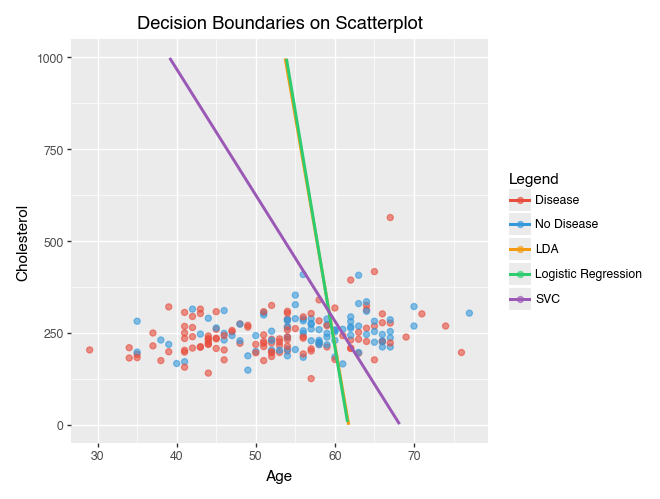

In [24]:
age_range = np.linspace(X['age'].min(), X['age'].max(), 300)

# Lines
chol_log_boundary = (-intercept_log - (coefs_log[0] * age_range)) / coefs_log[1]
chol_lda_boundary = (-intercept_lda - (coefs_lda[0] * age_range)) / coefs_lda[1]
chol_svc_boundary = (-intercept_svc - (coefs_svc[0] * age_range)) / coefs_svc[1]

# Dataframe for plotting
boundary_df = pd.DataFrame({
    'age': np.tile(age_range, 3),
    'chol': np.concatenate([chol_log_boundary, chol_lda_boundary, chol_svc_boundary]),
    'model': np.repeat(['Logistic Regression', 'LDA', 'SVC'], len(age_range))
})

# Plot
(p9.ggplot() 
    +p9.geom_point(data=ha, mapping=p9.aes(
        x='age', 
        y='chol', 
        color='factor(diagnosis)'), 
        alpha=0.6, size=2) 
    + p9.geom_line(data=boundary_df, mapping=p9.aes(
        x='age', 
        y='chol', 
        color='model'),size=1.2) 
    + p9.labs(title='Decision Boundaries on Scatterplot',
            x='Age',
            y='Cholesterol',
            color='Legend') 
    + p9.scale_color_manual(values={
        'No Disease': '#3498db',
        'Disease': '#e74c3c',
        'Logistic Regression': '#2ecc71',
        'LDA': '#f39c12',
        'SVC': '#9b59b6'
    }) 
    + p9.ylim(0, 1000)

)